In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 공공데이터를 이용한 카페 상권분석(2020 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 



[데이터] https://www.data.go.kr/data/15012005/fileData.do

In [ ]:
# 라이브러리를 불러옵니다.
import pandas as pd

## 1. 데이터 불러오기

In [ ]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
temp = pd.read_csv("/content/drive/MyDrive/11월강의자료/data/소상공인시장진흥공단_상가(상권)정보_인천_202209.csv",encoding='utf-8')
temp

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,27458653,칼스배드영수학원,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,2824510500100430000000001,라임빌,"인천광역시 계양구 임학서로41번길 5, (임학동, 라임빌)",407814.0,21030,NaN,NaN,NaN,126.731284,37.546507
1,22882934,간석미용실,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,2820010200101900026021270,NaN,"인천광역시 남동구 석촌로14번길 5, (간석동)",405803.0,21545,NaN,NaN,NaN,126.709349,37.461969
2,24444979,라헬,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2818510500109230000007532,금호동아아파트,"인천광역시 연수구 청능대로 124, (동춘동)",406775.0,21967,NaN,NaN,NaN,126.677224,37.410678
3,24872335,교동상회,NaN,D,소매,D06,가방/신발/액세서리,D06A07,양품점,G47419,...,2871040023105550000046629,NaN,"인천광역시 강화군 교동면 교동남로423번길 20, (상용리)",417921.0,23001,NaN,NaN,NaN,126.316681,37.779079
4,23397108,호텔써클,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,2817010200106280011000001,화이트캐슬,"인천광역시 미추홀구 토금중로3번길 28, (용현동)",402834.0,22186,NaN,NaN,NaN,126.635196,37.455288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120909,18766857,쌍용플레이방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A04,오락용사격장,R91229,...,2824510600102130002018103,초정마을두산쌍용아파트,"인천광역시 계양구 계양문화로 142, (용종동)",407054.0,21064,NaN,1,NaN,126.740974,37.540258
120910,18758691,컴포즈커피,주안센트레빌점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,2817710500100180071000001,NaN,"인천광역시 미추홀구 석정로433번길 31, (주안동)",402836.0,22124,NaN,NaN,NaN,126.684375,37.468028
120911,18772273,교동카센터,NaN,F,생활서비스,F14,자동차/이륜차,F14A01,자동차정비/카센타,NaN,...,2871040021104420006000001,NaN,"인천광역시 강화군 교동면 교동서로 9-31, (대룡리)",417922.0,23002,NaN,NaN,NaN,126.278870,37.779109
120912,18774152,다하,NaN,D,소매,D05,의복의류,D05A02,캐쥬얼/스포츠의류,G47416,...,2823710100101190015103641,그랜드캐슬,"인천광역시 부평구 부흥북로96번길 20-4, (부평동, 그랜드캐슬)",403817.0,21353,1,8,NaN,126.732476,37.500144


In [ ]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
from glob import glob

# csv 목록 불러오기
file_names = glob("data/*.csv")
total = pd.DataFrame()
# 모든 csv 병합하기
for file_name in file_names:
    temp = pd.read_csv(file_name, sep='|', encoding='utf-8')
    total = pd.concat([total, temp])

# reset index
total.reset_index(inplace=True, drop=True)
total

/Users/emphimachine/opt/anaconda3/envs/fastcampus/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819.0,48087.0,NaN,NaN,NaN,129.159641,35.164474
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074.0,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020.0,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751.0,48305.0,NaN,NaN,20,129.115397,35.143770
4,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813.0,47327.0,NaN,NaN,NaN,129.024938,35.151645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416247,17214333,아이지에이,논현점,D,소매,D03,종합소매점,D03A01,편의점,G47122,...,2820011000107390001000001,NaN,인천광역시 남동구 앵고개로815번길 19,405300.0,21679.0,NaN,NaN,101,126.723415,37.395174
2416248,17214671,땡이네애견용품,NaN,D,소매,D09,애견/애완/동물,D09A02,애완동물 미용실,S96995,...,2820010100111350001005296,청진네오스빌,인천광역시 남동구 예술로 230,405223.0,21557.0,NaN,NaN,531,126.702129,37.454645
2416249,17221174,인생건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2817710100103310012000001,더스테이프라임월드,인천광역시 미추홀구 인주대로 51,402012.0,22173.0,NaN,NaN,109,126.643929,37.459209
2416250,17221206,착한건어물,NaN,D,소매,D01,음/식료품소매,D01A11,건어물상,G47213,...,2818510500109370008149886,NaN,인천광역시 연수구 먼우금로 94,406802.0,21972.0,NaN,NaN,102,126.670416,37.407286


In [ ]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
data = temp[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명']]
data

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,칼스배드영수학원,NaN,학문/교육,학원-보습교습입시,인천광역시,계양구,계양2동
1,간석미용실,NaN,생활서비스,이/미용/건강,인천광역시,남동구,간석2동
2,라헬,NaN,소매,의복의류,인천광역시,연수구,동춘3동
3,교동상회,NaN,소매,가방/신발/액세서리,인천광역시,강화군,교동면
4,호텔써클,NaN,숙박,호텔/콘도,인천광역시,미추홀구,용현5동
...,...,...,...,...,...,...,...
120909,쌍용플레이방,NaN,관광/여가/오락,PC/오락/당구/볼링등,인천광역시,계양구,계산4동
120910,컴포즈커피,주안센트레빌점,음식,커피점/카페,인천광역시,미추홀구,주안5동
120911,교동카센터,NaN,생활서비스,자동차/이륜차,인천광역시,강화군,교동면
120912,다하,NaN,소매,의복의류,인천광역시,부평구,부평5동


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120914 entries, 0 to 120913
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     120914 non-null  int64  
 1   상호명        120914 non-null  object 
 2   지점명        19698 non-null   object 
 3   상권업종대분류코드  120914 non-null  object 
 4   상권업종대분류명   120914 non-null  object 
 5   상권업종중분류코드  120914 non-null  object 
 6   상권업종중분류명   120914 non-null  object 
 7   상권업종소분류코드  120914 non-null  object 
 8   상권업종소분류명   120914 non-null  object 
 9   표준산업분류코드   112077 non-null  object 
 10  표준산업분류명    112077 non-null  object 
 11  시도코드       120914 non-null  int64  
 12  시도명        120914 non-null  object 
 13  시군구코드      120914 non-null  int64  
 14  시군구명       120914 non-null  object 
 15  행정동코드      120914 non-null  int64  
 16  행정동명       120914 non-null  object 
 17  법정동코드      120914 non-null  int64  
 18  법정동명       120914 non-null  object 
 19  지번코드       120914 non-n

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416252 entries, 0 to 2416251
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   상호명       object
 1   지점명       object
 2   상권업종대분류명  object
 3   상권업종중분류명  object
 4   시도명       object
 5   시군구명      object
 6   행정동명      object
dtypes: object(7)
memory usage: 129.0+ MB


In [ ]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
del temp

In [ ]:
#total.head()

## 2. 데이터 구경하기

#### 전국 커피 전문점 

In [ ]:
#set(data["상권업종대분류명"])
set(data["상권업종중분류명"])

{'PC/오락/당구/볼링등',
 '가구소매',
 '가방/신발/액세서리',
 '가전제품소매',
 '가정/주방/인테리어',
 '개인/가정용품수리',
 '개인서비스',
 '건강/미용식품',
 '경마/경륜/성인오락',
 '광고/인쇄',
 '기타교육기관',
 '기타서비스업',
 '기타음식업',
 '기타판매업',
 '놀이/여가/취미',
 '닭/오리요리',
 '대중목욕탕/휴게',
 '대행업',
 '도서관/독서실',
 '모텔/여관/여인숙',
 '무도/유흥/가무',
 '물품기기대여',
 '민박/하숙',
 '법무세무회계',
 '별식/퓨전요리',
 '부동산관련서비스',
 '부동산임대',
 '부동산중개',
 '부페',
 '분식',
 '분양',
 '사무/문구/컴퓨터',
 '사진',
 '사진/광학/정밀기기소매',
 '선물/팬시/기념품',
 '세탁/가사서비스',
 '스포츠/운동',
 '시계/귀금속소매',
 '실내운동시설',
 '실외운동시설',
 '애견/애완/동물',
 '양식',
 '연구소',
 '연극/영화/극장',
 '예술품/골동품/수석/분재',
 '예식/의례/관혼상제',
 '요가/단전/마사지',
 '운동/경기용품소매',
 '운송/배달/택배',
 '운영관리시설',
 '유스호스텔',
 '유아교육',
 '유아용품',
 '유흥주점',
 '음/식료품소매',
 '음식배달서비스',
 '의복의류',
 '의약/의료품소매',
 '이/미용/건강',
 '인력/고용/용역알선',
 '일식/수산물',
 '자동차/이륜차',
 '자동차/자동차용품',
 '장례/묘지',
 '전시/관람',
 '제과제빵떡케익',
 '종교용품판매',
 '종합소매점',
 '주유소/충전소',
 '주택수리',
 '중고품소매/교환',
 '중식',
 '책/서적/도서',
 '철물/난방/건설자재소매',
 '취미/오락관련소매',
 '캠프/별장/펜션',
 '커피점/카페',
 '특수교육기관',
 '패스트푸드',
 '페인트/유리제품소매',
 '평가/개발/관리',
 '학교',
 '학문교육기타',
 '학원-보습교습입시',
 '학원-어학',
 '학원-예능취미체육'

In [ ]:
# 카페만 뽑아냅니다.
df_coffee = data[data["상권업종중분류명"] == "커피점/카페"]
#print(df_coffee.index)

# index를 다시 세팅합니다.
df_coffee.index = range(len(df_coffee))

print("인천 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee

인천 커피 전문점 점포 수 :  5826


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,현다방,NaN,음식,커피점/카페,인천광역시,미추홀구,용현1.4동
1,여비서다방,NaN,음식,커피점/카페,인천광역시,미추홀구,숭의2동
2,캐미커피,NaN,음식,커피점/카페,인천광역시,부평구,삼산1동
3,인천연수지역자활센터,NaN,음식,커피점/카페,인천광역시,연수구,동춘3동
4,고로케쿡,쿡커피,음식,커피점/카페,인천광역시,연수구,연수1동
...,...,...,...,...,...,...,...
5821,컴포즈커피,숭의로터리점,음식,커피점/카페,인천광역시,미추홀구,숭의1.3동
5822,발도스커피,송도역점,음식,커피점/카페,인천광역시,연수구,옥련1동
5823,블루밍,NaN,음식,커피점/카페,인천광역시,남동구,구월1동
5824,빽다방,송도스마트밸리점,음식,커피점/카페,인천광역시,연수구,송도3동


#### 서울내 커피 전문점 

In [ ]:
set(data["시도명"])

{'강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도'}

In [ ]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = data[(data["상권업종중분류명"] == "커피점/카페") & (data["시도명"] == "서울특별시")]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee

서울시 내 커피 전문점 점포 수 : 22239


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,요거프레소,쌍문점,음식,커피점/카페,서울특별시,도봉구,쌍문2동
2,406번째스토브,NaN,음식,커피점/카페,서울특별시,양천구,목1동
3,로얄커피숍,NaN,음식,커피점/카페,서울특별시,강동구,성내2동
4,빈트리망원점,망원점,음식,커피점/카페,서울특별시,마포구,망원1동
...,...,...,...,...,...,...,...
22234,로컬스티치북앤커피,NaN,음식,커피점/카페,서울특별시,영등포구,영등포본동
22235,카페시모,NaN,음식,커피점/카페,서울특별시,동작구,노량진2동
22236,만랩커피,오금역점,음식,커피점/카페,서울특별시,송파구,가락본동
22237,레프트커피,NaN,음식,커피점/카페,서울특별시,동대문구,회기동


#### 전국 스타벅스

In [ ]:
df_coffee_star = data[data["상호명"] == "스타벅스"]
df_coffee_star

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
1232,스타벅스,부평GM점,음식,커피점/카페,인천광역시,부평구,청천2동
2756,스타벅스,인천학익DT점,음식,커피점/카페,인천광역시,미추홀구,학익1동
3598,스타벅스,송림트레이더스점,음식,커피점/카페,인천광역시,동구,송림4동
6948,스타벅스,송도커넬워크점,음식,커피점/카페,인천광역시,연수구,송도2동
7387,스타벅스,부평시장역점,음식,커피점/카페,인천광역시,부평구,부평4동
7927,스타벅스,주안역점,음식,커피점/카페,인천광역시,미추홀구,주안1동
8589,스타벅스,인천예술회관역점,음식,커피점/카페,인천광역시,남동구,구월3동
8747,스타벅스,인하대점,음식,커피점/카페,인천광역시,미추홀구,용현1.4동
12238,스타벅스,부평사거리점,음식,커피점/카페,인천광역시,부평구,부평1동
13113,스타벅스,송도현대아울렛점,음식,커피점/카페,인천광역시,연수구,송도3동


In [ ]:
df_coffee["상호명"].str.contains("스타벅스")

0         False
1         False
2         False
3         False
4         False
          ...  
113700    False
113701    False
113702    False
113703    False
113704    False
Name: 상호명, Length: 113705, dtype: bool

In [ ]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee["상호명"].str.contains("스타벅스")]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks

전국 스타벅스 점포 수 : 66


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,부평GM점,음식,커피점/카페,인천광역시,부평구,청천2동
1,스타벅스부평역점,부평역점,음식,커피점/카페,인천광역시,부평구,부평1동
2,스타벅스,인천학익DT점,음식,커피점/카페,인천광역시,미추홀구,학익1동
3,스타벅스,송림트레이더스점,음식,커피점/카페,인천광역시,동구,송림4동
4,스타벅스,송도커넬워크점,음식,커피점/카페,인천광역시,연수구,송도2동
...,...,...,...,...,...,...,...
61,스타벅스,송도캐슬파크점,음식,커피점/카페,인천광역시,연수구,송도1동
62,스타벅스,NaN,음식,커피점/카페,인천광역시,남동구,만수5동
63,스타벅스,송도컨벤시아대로DT점,음식,커피점/카페,인천광역시,연수구,송도1동
64,스타벅스,스터디,음식,커피점/카페,인천광역시,서구,석남2동


In [ ]:
#  연수구에 있는 커피브랜드 갯수 구하기 -> 무슨 브랜드가 많을까
#1. 시군구에서 연수구만 뽑자 (-> 새로운데이터변수 필요함)

#2. 상호명이 서로다른 데이터셋에 대해서 구상하기 (-> 집합데이터형태 활용)

#3. 상호명에 따른 데이터 갯수 구하기

#-> 데이터프레임형태로 마지막에 만들기



#### 서울 스타벅스

In [ ]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks["시도명"] == "서울특별시"]
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 509


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,스타벅스,대학로점,음식,커피점/카페,서울특별시,종로구,이화동
1,스타벅스,한티점,음식,커피점/카페,서울특별시,강남구,대치4동
2,스타벅스,동숭로아트점,음식,커피점/카페,서울특별시,종로구,이화동
3,스타벅스남부터미널2점,남부터미널2점,음식,커피점/카페,서울특별시,서초구,서초3동
4,스타벅스,가로수길점,음식,커피점/카페,서울특별시,강남구,신사동


#### 전국 이디야

In [ ]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_ediya = df_coffee[df_coffee["상호명"].str.contains("이디야")]
df_ediya.index = range(len(df_ediya))
print('전국 이디야 점포 수 :', len(df_ediya))
df_ediya

전국 이디야 점포 수 : 2238


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,반송도서관점,음식,커피점/카페,부산광역시,해운대구,반송1동
1,이디야커피,부산다대포점,음식,커피점/카페,부산광역시,사하구,다대1동
2,이디야커피,부산초량역점,음식,커피점/카페,부산광역시,동구,초량3동
3,이디야커피,장림점,음식,커피점/카페,부산광역시,사하구,장림2동
4,이디야커피,부산신만덕점,음식,커피점/카페,부산광역시,북구,만덕2동
...,...,...,...,...,...,...,...
2233,이디야커피,인천시청점,음식,커피점/카페,인천광역시,남동구,간석1동
2234,이디야커피,인천서구청점,음식,커피점/카페,인천광역시,서구,연희동
2235,이디야커피,청천점,음식,커피점/카페,인천광역시,부평구,청천2동
2236,이디야커피,NaN,음식,커피점/카페,인천광역시,미추홀구,도화2.3동


#### 서울 이디야

In [ ]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_ediya = df_ediya[df_ediya["시도명"] == "서울특별시"]
df_seoul_ediya.index = range(len(df_seoul_ediya))
print('서울시 내 이디야 점포 수 :', len(df_seoul_ediya))
df_seoul_ediya.head()

서울시 내 이디야 점포 수 : 474


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,이디야커피,신길역점,음식,커피점/카페,서울특별시,영등포구,신길1동
1,이디야커피,북창동점,음식,커피점/카페,서울특별시,중구,소공동
2,이디야커피,라이프점,음식,커피점/카페,서울특별시,영등포구,여의동
3,이디야커피,시흥점,음식,커피점/카페,서울특별시,금천구,시흥2동
4,이디야커피양재AT점,양재AT점,음식,커피점/카페,서울특별시,서초구,양재2동


#### 전국 커피빈 

In [ ]:
df_coffeebean = df_coffee[df_coffee['상호명'].str.contains('커피빈')]
df_coffeebean.index = range(len(df_coffeebean))
print('전국 커피빈 점포 수 :', len(df_coffeebean))
df_coffeebean.head()

전국 커피빈 점포 수 : 324


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,부산무역센터점,음식,커피점/카페,부산광역시,중구,중앙동
1,커피빈,코리아해운대한화콘도앞점,음식,커피점/카페,부산광역시,해운대구,우1동
2,커피빈,코리아부산화명수정역점,음식,커피점/카페,부산광역시,북구,화명1동
3,커피빈코리아부산수영역점,코리아부산수영역점,음식,커피점/카페,부산광역시,수영구,광안3동
4,커피빈부산정관점,부산정관점,음식,커피점/카페,부산광역시,기장군,정관읍


#### 서울 커피빈 

In [ ]:
df_seoul_coffeebean = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('커피빈')]
df_seoul_coffeebean.index = range(len(df_seoul_coffeebean))
print('서울시 내 커피빈 점포 수 :', len(df_seoul_coffeebean))
df_seoul_coffeebean.head()

서울시 내 커피빈 점포 수 : 191


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,커피빈,코리아대학로대명거리점,음식,커피점/카페,서울특별시,종로구,혜화동
1,커피빈,코리아선릉역점,음식,커피점/카페,서울특별시,강남구,역삼1동
2,커피빈코리아낙성대역점,코리아낙성대역점,음식,커피점/카페,서울특별시,관악구,행운동
3,커피빈,코리아청담에스점,음식,커피점/카페,서울특별시,강남구,청담동
4,커피빈,코리아청담성당점,음식,커피점/카페,서울특별시,강남구,청담동


#### 전국 투썸 

In [ ]:
df_2some = df_coffee[df_coffee['상호명'].str.contains('투썸')]
df_2some.index = range(len(df_2some))
print('전국 투썸플레이스 점포 수 :', len(df_2some))
df_2some.head()

전국 투썸플레이스 점포 수 : 1141


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸플레이스,대연점,음식,커피점/카페,부산광역시,남구,대연3동
1,투썸플레이스,센텀스카이비즈점,음식,커피점/카페,부산광역시,해운대구,재송1동
2,투썸플레이스부산명지국제신도시점,부산명지국제신도시점,음식,커피점/카페,부산광역시,강서구,명지동
3,투썸플레이스,벡스코점,음식,커피점/카페,부산광역시,해운대구,우2동
4,투썸플레이스,NaN,음식,커피점/카페,부산광역시,사상구,괘법동


#### 서울 투썸 

In [ ]:
df_seoul_2some = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('투썸')]
df_seoul_2some.index = range(len(df_seoul_2some))
print('서울시 내 투썸플레이스 점포 수 :', len(df_seoul_2some))
df_seoul_2some.head()

서울시 내 투썸플레이스 점포 수 : 71


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,투썸커피인천공항출국B점,NaN,음식,커피점/카페,인천광역시,중구,운서동
1,투썸플레이스,인천공항입국점,음식,커피점/카페,인천광역시,중구,운서동
2,투썸플레이스,인천소래역점,음식,커피점/카페,인천광역시,남동구,논현1동
3,투썸플레이스,부평점,음식,커피점/카페,인천광역시,부평구,부평5동
4,투썸플레이스부평CGV,NaN,음식,커피점/카페,인천광역시,부평구,청천1동


#### 전국 빽다방 

In [ ]:
df_bbaek = df_coffee[df_coffee['상호명'].str.contains('빽다방')]
df_bbaek.index = range(len(df_bbaek))
print('전국 빽다방 점포 수 :', len(df_bbaek))
df_bbaek.head()

전국 빽다방 점포 수 : 567


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,빽다방,부산광복로점,음식,커피점/카페,부산광역시,중구,남포동
1,빽다방,NaN,음식,커피점/카페,부산광역시,부산진구,부전2동
2,빽다방,부산구남역점,음식,커피점/카페,부산광역시,북구,구포2동
3,빽다방,서면영광도서점,음식,커피점/카페,부산광역시,부산진구,부전1동
4,빽다방부산대역점,부산대역점,음식,커피점/카페,부산광역시,금정구,장전3동


#### 서울 빽다방 

In [ ]:
df_seoul_bbaek = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('빽다방')]
df_seoul_bbaek.index = range(len(df_seoul_bbaek))
print('서울시 내 빽다방 점포 수 :', len(df_seoul_bbaek))
df_seoul_bbaek.head()

서울시 내 빽다방 점포 수 : 129


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,더본코리아_빽다방등촌,성당점,음식,커피점/카페,서울특별시,강서구,등촌3동
1,스시마이우강남역빽다방,NaN,음식,커피점/카페,서울특별시,서초구,서초4동
2,빽다방공덕새창로점,공덕새창로점,음식,커피점/카페,서울특별시,마포구,도화동
3,빽다방서초우성점,서초우성점,음식,커피점/카페,서울특별시,서초구,서초2동
4,빽다방잠실장미상가,NaN,음식,커피점/카페,서울특별시,송파구,잠실6동


#### 전국 할리스 

In [ ]:
df_hollys = df_coffee[df_coffee['상호명'].str.contains('할리스')]
df_hollys.index = range(len(df_hollys))
print('전국 할리스 점포 수 :', len(df_hollys))
df_hollys.head()

전국 할리스 점포 수 : 707


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피,부산교대점,음식,커피점/카페,부산광역시,동래구,수민동
1,할리스커피,부산명륜자이점,음식,커피점/카페,부산광역시,동래구,명륜동
2,할리스커피일광해안로점,일광해안로점,음식,커피점/카페,부산광역시,기장군,일광면
3,할리스커피,부산대역점,음식,커피점/카페,부산광역시,금정구,장전3동
4,할리스커피사상점,사상점,음식,커피점/카페,부산광역시,사상구,괘법동


#### 서울 할리스 

In [ ]:
df_seoul_hollys = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('할리스')]
df_seoul_hollys.index = range(len(df_seoul_hollys))
print('서울시 내 할리스 점포 수 :', len(df_seoul_hollys))
df_seoul_hollys.head()

서울시 내 할리스 점포 수 : 200


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,할리스커피남부터미널,NaN,음식,커피점/카페,서울특별시,서초구,서초1동
1,할리스,백석예술대점,음식,커피점/카페,서울특별시,서초구,방배3동
2,할리스,국기원점,음식,커피점/카페,서울특별시,강남구,역삼1동
3,할리스커피KBS본관점,KBS본관점,음식,커피점/카페,서울특별시,영등포구,여의동
4,할리스커피,선릉점,음식,커피점/카페,서울특별시,강남구,대치4동


#### 전국 메가커피

In [ ]:
df_mega = df_coffee[df_coffee['상호명'].str.contains('메가커피')]
df_mega.index = range(len(df_mega))
print('전국 메가커피 점포 수 :', len(df_mega))
df_mega.head()

전국 메가커피 점포 수 : 481


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피,해운대해변점,음식,커피점/카페,부산광역시,해운대구,중1동
1,메가커피반여점,반여점,음식,커피점/카페,부산광역시,해운대구,반여2동
2,메가커피,해운대좌동점,음식,커피점/카페,부산광역시,해운대구,좌4동
3,메가커피,NaN,음식,커피점/카페,부산광역시,사하구,하단2동
4,메가커피,사직역점,음식,커피점/카페,부산광역시,동래구,사직1동


#### 서울 메가커피 

In [ ]:
df_seoul_mega = df_seoul_coffee[df_seoul_coffee['상호명'].str.contains('메가커피')]
df_seoul_mega.index = range(len(df_seoul_mega))
print('서울시 내 메가커피 점포 수 :', len(df_seoul_mega))
df_seoul_mega.head()

서울시 내 메가커피 점포 수 : 86


,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,메가커피미아,수유시장점,음식,커피점/카페,서울특별시,강북구,미아동
1,메가커피,홍대점,음식,커피점/카페,서울특별시,마포구,서교동
2,메가커피,NaN,음식,커피점/카페,서울특별시,동대문구,용신동
3,메가커피,NaN,음식,커피점/카페,서울특별시,금천구,가산동
4,메가커피,숙대입구역점,음식,커피점/카페,서울특별시,용산구,남영동


## 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**2020년 12월 기준 커피전문점 평판 순위**


(source : https://www.futurekorea.co.kr/news/articleView.html?idxno=125637)

1. 스타벅스
2. 투썸플레이스
3. 이디야
4. 메가커피
5. 커피빈

**변수**

- 전체 점포 : data
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 커피빈 : df_coffeebean / df_seoul_coffeebean
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek
- 전체/서울 할리스 : df_hollys / df_seoul_hollys
- 전체/서울 메가커피 : df_mega / df_seoul_mega

### 1) 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [ ]:
print("**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****")
print("주요 5대 커피브랜드 전국 입점 비율 : %.3f%%"\
      % ((len(df_starbucks)+len(df_2some)+len(df_ediya)+len(df_mega)+len(df_coffeebean))
        / len(df_coffee) * 100))
print("1. 스타벅스 : %.3f%%" % (len(df_starbucks) / len(df_coffee) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_2some) / len(df_coffee) * 100))
print("3. 이디야 : %.3f%%" % (len(df_ediya) / len(df_coffee) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_mega) / len(df_coffee) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_coffeebean) / len(df_coffee) * 100))

**** 전국 커피전문점중 주요 5대 커피브랜드 입점 비율 ****
주요 5대 커피브랜드 전국 입점 비율 : 5.098%
1. 스타벅스 : 1.419%
2. 투썸플레이스 : 1.003%
3. 이디야 : 1.968%
4. 메가커피 : 0.423%
5. 커피빈 : 0.285%


### 2) 서울 커피전문점 내 주요 커피브랜드 입점 비율 

In [ ]:
print("스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100))
print("이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_seoul_coffee)* 100))
print("커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_seoul_coffee)* 100))
print("투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_seoul_coffee)* 100))
print("빽다방 : %.3f%%" % (len(df_seoul_bbaek) / len(df_seoul_coffee)* 100))
print("할리스 : %.3f%%" % (len(df_seoul_hollys) / len(df_seoul_coffee)* 100))
print("메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_seoul_coffee)* 100))

스타벅스 : 2.289%
이디야 : 2.131%
커피빈 : 0.859%
투썸플레이스 : 1.286%
빽다방 : 0.580%
할리스 : 0.899%
메가커피 : 0.387%


### 3) 각 커피브랜드별 서울 입점 비율 

In [ ]:
print("**** 주요 5대 커피브랜드별 서울 입점 비율 ****")
print("1. 스타벅스 : %.3f%%" % (len(df_seoul_starbucks) / len(df_starbucks) * 100))
print("2. 투썸플레이스 : %.3f%%" % (len(df_seoul_2some) / len(df_2some) * 100))
print("3. 이디야 : %.3f%%" % (len(df_seoul_ediya) / len(df_ediya) * 100))
print("4. 메가커피 : %.3f%%" % (len(df_seoul_mega) / len(df_mega) * 100))
print("5. 커피빈 : %.3f%%" % (len(df_seoul_coffeebean) / len(df_coffeebean) * 100))

**** 주요 5대 커피브랜드별 서울 입점 비율 ****
1. 스타벅스 : 31.556%
2. 투썸플레이스 : 25.066%
3. 이디야 : 21.180%
4. 메가커피 : 17.879%
5. 커피빈 : 58.951%


In [ ]:
# 각 구별로 스타벅스가 얼마나 있는지 확인합니다.
starbucks_gu = df_seoul_starbucks.groupby('시군구명')['상호명'].count().to_frame().sort_values(by='상호명', ascending=False)
starbucks_gu = starbucks_gu.reset_index()
starbucks_gu = starbucks_gu.set_index('시군구명')
starbucks_gu

,상호명
시군구명,
강남구,87
중구,48
서초구,44
송파구,33
종로구,31
마포구,28
영등포구,26
용산구,21
서대문구,21


In [ ]:
# 시각화를 위한 라이브러리를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
%matplotlib inline

In [ ]:
#### Windows10 사용자는 해당 코드가 필요없습니다!

# macos에서 사용가능한 한글 글꼴 확인 코드
[f.name for f in font_manager.fontManager.ttflist if 'Neo' in f.name]

['Apple SD Gothic Neo']

In [ ]:
## 운영체제별 글꼴 세팅

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    font_name = 'Apple SD Gothic Neo'
    rc('font', family='Apple SD Gothic Neo')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    font_name = font_manager.FontProperties(fname="/usr/share/fonts/nanumfont/NanumGothic.ttf")
    rc('font', family="NanumGothic")

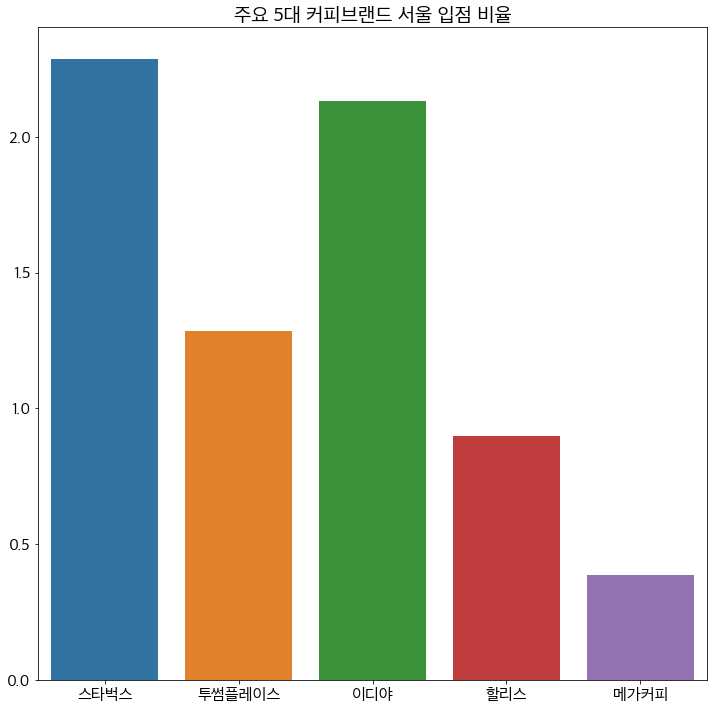

In [ ]:
# 주요 5대 커피브랜드 서울 입점 비율을 시각화합니다.
starbucks_rate = (len(df_seoul_starbucks) / len(df_seoul_coffee) * 100)
ediya_rate = (len(df_seoul_ediya) / len(df_seoul_coffee)* 100)
hollys_rate = (len(df_seoul_hollys) / len(df_seoul_coffee)* 100)
twosome_rate = (len(df_seoul_2some) / len(df_seoul_coffee)* 100)
mega_rate = (len(df_seoul_mega) / len(df_seoul_coffee)* 100)


# starbucks_rate = (len(df_seoul_starbucks) / len(df_starbucks) * 100)
# twosome_rate = (len(df_seoul_2some) / len(df_2some) * 100)
# ediya_rate = (len(df_seoul_ediya) / len(df_ediya) * 100)
# mega_rate = (len(df_seoul_mega) / len(df_mega) * 100)
# coffeebean_rate = (len(df_seoul_coffeebean) / len(df_coffeebean) * 100)

X = ["스타벅스", "투썸플레이스", "이디야", "할리스", "메가커피"]
y = [starbucks_rate, twosome_rate, ediya_rate, hollys_rate, mega_rate]

plt.figure(figsize=(12, 12))
plt.title("주요 5대 커피브랜드 서울 입점 비율", fontdict={"fontsize" : 20})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=X, y=y)
plt.savefig("coffee_barplot.png")
plt.show()

### (Challenge) More Prettier!

In [ ]:
# 위의 barplot을 seaborn을 이용하여 더욱 멋지게 시각화해보세요!

In [18]:
df_coffee

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
0,현다방,NaN,음식,커피점/카페,인천광역시,미추홀구,용현1.4동
1,여비서다방,NaN,음식,커피점/카페,인천광역시,미추홀구,숭의2동
2,캐미커피,NaN,음식,커피점/카페,인천광역시,부평구,삼산1동
3,인천연수지역자활센터,NaN,음식,커피점/카페,인천광역시,연수구,동춘3동
4,고로케쿡,쿡커피,음식,커피점/카페,인천광역시,연수구,연수1동
...,...,...,...,...,...,...,...
5821,컴포즈커피,숭의로터리점,음식,커피점/카페,인천광역시,미추홀구,숭의1.3동
5822,발도스커피,송도역점,음식,커피점/카페,인천광역시,연수구,옥련1동
5823,블루밍,NaN,음식,커피점/카페,인천광역시,남동구,구월1동
5824,빽다방,송도스마트밸리점,음식,커피점/카페,인천광역시,연수구,송도3동


In [20]:
yeonsu_coffee = df_coffee[df_coffee["시군구명"]=="연수구"]
yeonsu_coffee

,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명
3,인천연수지역자활센터,NaN,음식,커피점/카페,인천광역시,연수구,동춘3동
4,고로케쿡,쿡커피,음식,커피점/카페,인천광역시,연수구,연수1동
20,삼성웰스토리포스코R&D카페,그랑포스코R&D센터점,음식,커피점/카페,인천광역시,연수구,송도3동
25,COFFEEBEAN송도홈플러스점,송도홈플러스점,음식,커피점/카페,인천광역시,연수구,송도3동
43,카페우토리송도센트럴파크점,송도센트럴파크점,음식,커피점/카페,인천광역시,연수구,송도2동
...,...,...,...,...,...,...,...
5794,카페,해마루,음식,커피점/카페,인천광역시,연수구,송도1동
5800,메가엠지씨커피송도NC큐브점,NaN,음식,커피점/카페,인천광역시,연수구,송도2동
5808,크로플덕,송도점,음식,커피점/카페,인천광역시,연수구,송도3동
5822,발도스커피,송도역점,음식,커피점/카페,인천광역시,연수구,옥련1동


In [21]:
coffee_name = set(df_coffee["상호명"])
coffee_name

{'숨카페',
 '포텐스터디카페',
 '에그드랍',
 '카페베네인천지법본원점',
 '빈스토리',
 'Cafe거기',
 '씨티디',
 '카페진',
 '쉬즈베이글',
 '아이플러스유',
 '커피온리예술회관점',
 '8블럭',
 'W스트리트',
 '레오커피',
 '홍루이젠',
 '홀린이홀덤',
 '마리웨일마카롱부평로데오점',
 '청라골든스터디카페',
 '투썸플레이스부평역점',
 '카페을왕',
 'The끌림',
 '오느레커피',
 '독존',
 '향다방',
 '위드커피',
 '큐커피',
 '아이엠커피',
 '그리니쉬',
 '아라커피숍',
 '롱커피',
 '우다방',
 '퓨로쥬스',
 '섬,꾸지',
 '강화까까',
 '카페연가',
 '카페베즐리KCC홈씨씨점',
 '르블레',
 '그루터기',
 '풀잎다방',
 '레드도어',
 '밀크닉',
 '어그니스',
 '한옥찻집',
 '벨유커피',
 '카페헤이',
 '석영다방',
 '카페와안',
 '모노치즈',
 '카페순',
 '대지다방',
 '달무리커피숍',
 '카페91',
 '주란다방',
 '커피비스토리',
 '메종드까페드샤론',
 '카페줄리아노',
 '제이로커스',
 '스웨이하우스커피',
 '커피생각',
 '청라의숲',
 '카페홈',
 '그날의온도',
 '삼화다방',
 '에이치카롱',
 '라무르Lamour',
 '백팔십도씨',
 '카페연다',
 '모마엔젤리너스인천계산',
 '수플테라',
 '고래면옥',
 '샘Cafe',
 '스마트커피전문가',
 '더블스윗',
 '오페라빈',
 '베이지가든',
 '착한붕어낚시카페',
 '커피에술',
 '크로플각',
 '커피화로스터스컴퍼니',
 '휘피',
 '마미쿡카페수',
 '스무디킹',
 '씨포',
 '블룸블리',
 '엠바웃',
 '드로젠송도트리플점',
 '아방가르드',
 '라이브카페',
 '백다방더블유병원점',
 'ARK',
 '리젠트커피',
 '태련다방',
 '만부디저트',
 '계성다방',
 '카페인',
 '잠시동안쉴곳',
 '샤샤롱',
 '펫앤슈즈셀프빨래방',
 '에뚜쁠',
 '시에스타',
